1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import scipy
import seaborn as sns
import scipy as sp

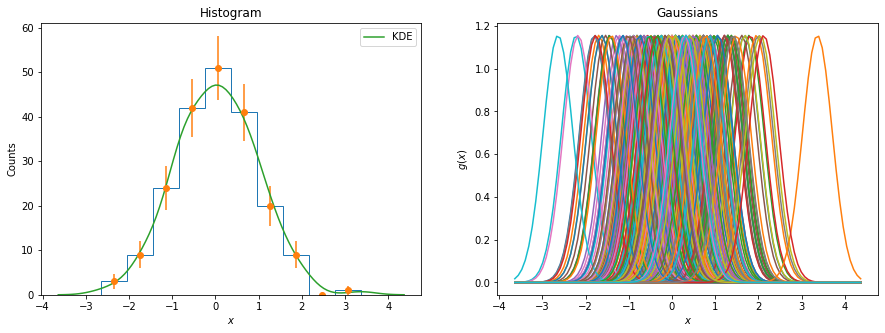

In [34]:
x = np.random.normal(0,1,200)
nbins = 10
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
y, bin_edges, _ = ax1.hist(x, bins=nbins, histtype='step')
y_err = np.sqrt(y)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
bin_size = bin_edges[1] - bin_edges[0]
area = len(x)*bin_size

ax1.set_xlabel('$x$')
ax1.set_ylabel('Counts')
ax1.minorticks_off
ax1.errorbar(bin_centers, y, y_err, fmt='o')
ax1.set_title('Histogram')

ax2.set_title('Gaussians')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$g(x)$')
points = np.linspace(bin_edges[0]-1, bin_edges[-1]+1, 100)
devstd = 1.06*np.std(x)*len(x)**(-1/5)
gaus = [norm(i, devstd) for i in x]
kde = np.zeros(len(points))
for f in gaus:
    ax2.plot(points, f.pdf(points))
    kde += f.pdf(points)

kde *= area/scipy.integrate.trapz(kde, points)
ax1.plot(points, kde, label='KDE')
ax1.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

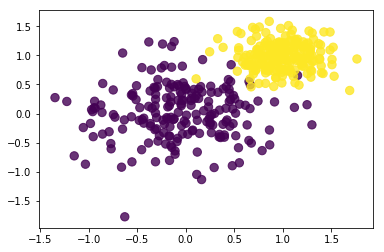

In [35]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

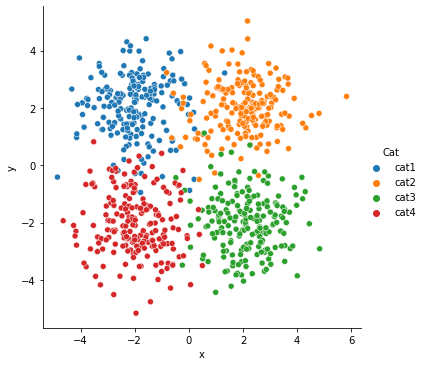

In [36]:
def cat(cat_names, nsamples, dev_std, means):
    cov_mat = [[dev_std**2, 0], [0, dev_std**2]]
    nrows = nsamples*len(cat_names)
    a_samples = np.array([np.random.multivariate_normal(m, cov_mat, nsamples) for m in means]).reshape(nrows, 2)
    a_names = np.array([[name for _ in range(nsamples)] for name in cat_names]).flatten()
    samples = pd.DataFrame(a_samples, columns=['x', 'y'])
    samples.insert(0, 'Cat', a_names)
    return samples

names = ['cat1', 'cat2', 'cat3', 'cat4']
nsamples = 200
dev_std = 1
means = [[-2,2], [2,2], [2,-2], [-2,-2]]
data = cat(names, nsamples, dev_std, means)
data.head()
sns.relplot(x='x', y='y', hue='Cat', data=data)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [37]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

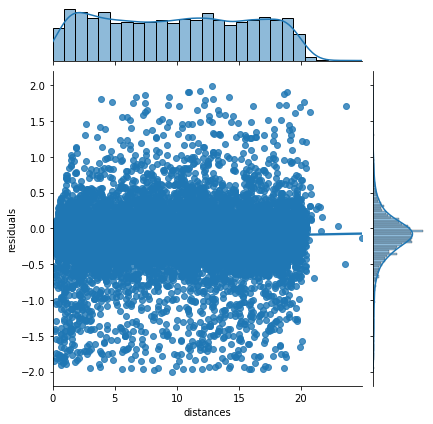

In [61]:
datafile = np.load('residuals_261.npy', allow_pickle=True)
data = pd.DataFrame(datafile.item())
data
fdata = data[np.abs(data['residuals']) < 2]
slope, intercept, _, _, _ = sp.stats.linregress(fdata['distances'], fdata['residuals'])
sns.jointplot(x='distances', y='residuals', data=fdata, kind='reg')

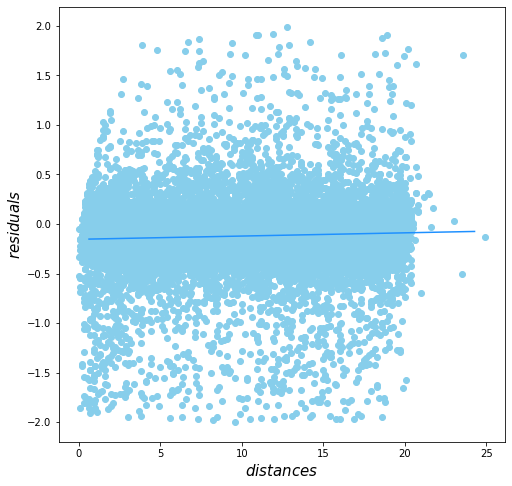

In [88]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
_, edges = np.histogram(fdata['distances'], bins=20)
x = 0.5*(edges[1:] + edges[:-1])
ax1.scatter('distances', 'residuals', data=fdata, color='skyblue')
ax1.set_xlabel(
    '$distances$', size=15)
ax1.set_ylabel('$residuals$', size=15)
ax1.plot(x, intercept+slope*x, color='dodgerblue')